# Tratamento de valores faltantes/missing data

## Porque tratar valores faltantes?

Precisamos tratar valores nulos, pois boa parte da pesquisa sobre um dado é como se estivéssemos procurando peças que faltam em nossos quebra-cabeças, as peças faltantes são onde moram o ouro da ciência de dados. Saber encontrar valores mais próximos do real nesses pedaços podem significar uma predição dos seus alvos mais tranquilo e mais precisa.

## Quais os tipos de valores faltantes?

Como os dados são apresentados de várias formas, o pandas pretende ser flexível em relação ao tratamento de dados ausentes. Enquanto `NaN` é o marcador de valor ausente padrão por razões de velocidade e conveniência computacional, precisamos ser capazes de detectar facilmente esse valor com dados de diferentes tipos: ponto flutuante, número inteiro, booleano e objeto geral. Em muitos casos, no entanto, o `Python None` surgirá e queremos considerar também que “ausente” ou “não disponível” ou “NA”.

## Cuidados na predição de valores nulos

Ao tentarmos prever um valor nulo é bem importante gerar comparações e estatísticas sobre o dataset, pois podemos facilmente tomar uma decisão errada na hora de preencher esse dado e prejudicar toda análise.

![alt text](https://contentmamluswest001.blob.core.windows.net/content/14b2744cf8d6418c87ffddc3f3127242/9502630827244d60a1214f250e3bbca7/ecf0cd2215f74d0b9ae643c36e932d1e/image)

Precisamos importantar novamente o `pandas` o dataset já criado.

In [1]:
import pandas
titanic = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/titanic_2_part.csv")

In [2]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,adulto
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,adulto
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,criança
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,adulto
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,adolescente


**Como conseguimos saber quantos valores faltantes (nulos) temos?**

O pandas tem uma função chamada `isnull` que para cada linha ele verifica se tem algum valor faltando, após isso podemos somar (`sum`) todos os valores para contar quantos dados faltam por coluna.

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Relatives        0
AgeRange       177
dtype: int64

Vamos entender como esse conjunto de comandos funcionam.

1- Vamos selecionar uma coluna e verificar os valores nulos nela.

In [4]:
titanic["Age"].isnull().head(20)

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
Name: Age, dtype: bool

Veja que algumas linhas retornam `False`, essas linhas não são nulas e outras retornam `True`, nos informando que elas são nulas/dados faltantes.

**Como o SUM funciona se nós vamos somar dados booleanos e não inteiros?**

Os dados booleanos `True/False` são representações dos dados binários `1/0`, então quando somamos True estamos fazendo o mesmo que somarmos 1.

In [5]:
True + True

2

In [6]:
False + False

0

In [7]:
True + False

1

In [8]:
sum([True, True, False])

2

Com isso conseguimos somar os valores verdadeiros e falsos que o `isnull` retorna.

In [9]:
titanic["Age"].isnull().sum()

177

**Como pesquisadores, adoramos tentar descobrir os valores faltantes, pois eles são lacunas históricas e no futuro quando quisermos fazer predições usando ML os dados faltantes não vão nos ajudar**

Quando vemos dados faltantes podemos tomar 2 decisões: **Apagar** ou **Tratar**.

### Apagando valores nulos

Primeiro vamos ver como fazemos para apagar os dados faltantes, isso só deverá sem usado se os dados a serem apagados não representem uma grande perda de dados relevantes.

Nós apagamos as linhas que faltam dados usando o `dropna`.

In [10]:
titanic["Age"].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

Repare que quando apagamos os dados o pandas nos retorna um dado chamado `Length` se olharmos ele já vimos que temos menos linhas nessa Serie que na original mas podemos verificar se deu certo nossa remoção usando o `isnull`.

In [11]:
idades_nao_nulas = titanic["Age"].dropna()
qnt_idades_nulas_dropna = idades_nao_nulas.isnull().sum()

print("Quantidade de valores nulos: {}".format(qnt_idades_nulas_dropna))

Quantidade de valores nulos: 0


Existem outras formas de saber quantos valores nulos temos na nossa série, um jeito é compara o `size` com o `count`.

**`size`** - o tamanho total da série

In [12]:
titanic["Age"].size

891

**`count`** - a quantidade de valores não nulos na série

In [13]:
titanic["Age"].count()

714

O `size` e o `count` de listas sem valores não nulos são iguais.

In [14]:
idades_nao_nulas.size == idades_nao_nulas.count()

True

__Atribuir uma série com os valores nulos apagados a uma coluna do DataFrame não faz sentido! A coluna vai voltar a possuir valores nulos__


Como o tamanho da Série vai ser diferente da quantidade de linhas do Dataframe, os valores que faltam na série serão colocados como __nulos__ conforme o índice. 

In [15]:
titanic["idades_nao_nulas"] = idades_nao_nulas

In [16]:
titanic[["idades_nao_nulas","Age"]].head(10)

,idades_nao_nulas,Age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,NaN
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


Isso acontece por causa do índice

In [17]:
idades_nao_nulas.head(10) # procure o 5

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

### 3.2 - Tratamento de valores faltantes

Se desejamos preencher os valores nulos com algum valor, podemos usar o `fillna`. Nesse caso, se criarmos uma coluna com o resultado do `fillna`, ela realmente não terá mais valores nulos!

**Primeiro tratamento vai ser acabar com os dados nulos trocando por um valor não real para uma idade `-1`**

In [18]:
titanic["Age"].fillna(-1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    -1.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Nós agora podemos ver que o `Length` é igual ao total de linhas do dataset.

In [19]:
serie_idade_sem_nulo = titanic.Age.fillna(-1)

Vamos ver como não temos mais nulos.

In [20]:
serie_idade_sem_nulo.isnull().sum()

0

No caso do tratamento nós podemos associar o seu resultado a uma coluna sem problemas.

**Recomendamos quando criar uma coluna assim documentar no nome dela qual técnica foi usada na coluna**

In [21]:
titanic["Age_fillna_1"] = serie_idade_sem_nulo

In [26]:
titanic.Age_fillna_1.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

**Vamos ver o impacto que marcar as linhas nulas com `-1` trouxe.**

### **Desafio:** Calcule a média das idades na coluna `Age` e `Age_fillna_1`

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [25]:
#solução
print(titanic.Age.mean())
titanic.Age_fillna_1.mean()

29.69911764705882


23.600639730639728

Uma outra forma de visualizar bem o impacto de mudar os nulos pelo -1 é olhar como ficam distribuídos os dados em um histograma.

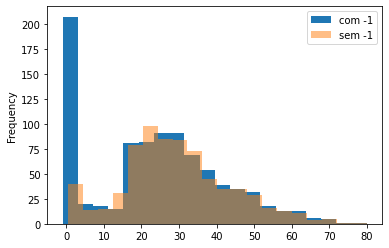

In [27]:
%matplotlib inline

titanic["Age_fillna_1"].plot.hist(bins=20)
titanic["Age"].plot.hist(bins=20, alpha=0.5).legend(["com -1", "sem -1"])

**Preencher com `-1` não parece ser a melhor escolha.**

Ele aumentou muito a concentração dos valores para o primeiro bin. Isso faz com que no futuro a gente tente fazer uma predição vai achar que muito das idades são baixas e não mais perto da média.

### **Desafio:** Preencha os valores das idades nulas com a média das idades.

Insira o resultado em uma coluna chamada `Age_fillna_mean`.

Após verifique como a distribuição dos dados ficou. Qual conclusão você chegou?

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [33]:
#solução
titanic['Age_fillna_mean'] = titanic.Age.fillna(round(titanic.Age.mean(), 2))
titanic.Age_fillna_mean.mean()

29.69929292929302

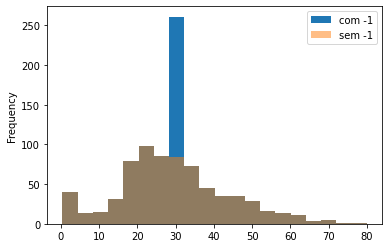

In [34]:
titanic["Age_fillna_mean"].plot.hist(bins=20)
titanic["Age"].plot.hist(bins=20, alpha=0.5).legend(["com -1", "sem -1"])

**Vamos melhorar o uso das médias para predizer a idade dos passageiros usando a média pelo sexo.** 

Vamos preencher os nulos de maneira que se o passageiro for mulher esse recebe a idade media das mulheres.
Se o passageiro for homem ele recebe a idade média dos homens.

1- Vamos descobrir as médias das idades de cada sexo

In [35]:
media_mulher = titanic["Age"][titanic["Sex"] == "female"].mean()
media_homen = titanic["Age"][titanic["Sex"] == "male"].mean()

print("""
Media de idade das mulheres: {}
Media de idade dos homens: {}""".format(media_mulher,media_homen))


Media de idade das mulheres: 27.915708812260537
Media de idade dos homens: 30.72664459161148


2- Agora vamos criar uma função que vai para cada linha nula colocar o valor da média dado o sexo, para as linhas já com a idade o valor será a própria idade.

In [36]:
def idade_media_por_sexo(linha):
    idade = linha["Age"]
    sexo = linha["Sex"]
    
    if pandas.isnull(idade): #funcao do pandas para verificar se na linha tem dado nulo
        
        if sexo == "female":
            return media_mulher
        else:
            return media_homen
        
    else:
        return idade
    

idades_preenchidas = titanic.apply(idade_media_por_sexo,axis=1)

print("Quantidade de nulos após o preenchimento: {}".format(idades_preenchidas.isnull().sum()))       

Quantidade de nulos após o preenchimento: 0


3- Vamos associar a série criada a uma nova coluna

In [37]:
titanic["Age_fillna_mean_sex"] = idades_preenchidas

4- Vamos ver como ficou.

In [38]:
titanic[["Sex", "Age", "Age_fillna_mean_sex"]].head(20)

,Sex,Age,Age_fillna_mean_sex
0,male,22.0,22.000000
1,female,38.0,38.000000
2,female,26.0,26.000000
3,female,35.0,35.000000
4,male,35.0,35.000000
5,male,NaN,30.726645
6,male,54.0,54.000000
7,male,2.0,2.000000
8,female,27.0,27.000000
9,female,14.0,14.000000


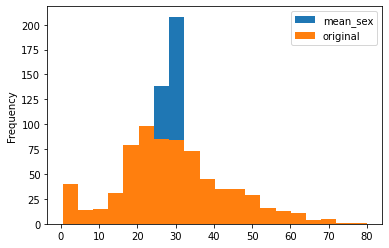

In [39]:
titanic["Age_fillna_mean_sex"].plot.hist(bins=20)
titanic["Age"].plot.hist(bins=20).legend(["mean_sex", "original"])

### **Desafio:** Verifique como ficou a distribuição do `Age_fillna_mean` e do `Age_fillna_mean_sex` para os passageiros para cada sexo comparando ao `Age`.

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

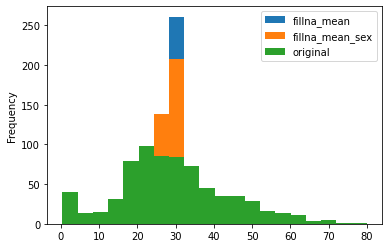

In [41]:
#solução
titanic["Age_fillna_mean"].plot.hist(bins=20)
titanic["Age_fillna_mean_sex"].plot.hist(bins=20)
titanic["Age"].plot.hist(bins=20).legend(["fillna_mean", "fillna_mean_sex","original"])

## 4 - Agrupamento/Group By

Podemos agrupar os dados baseados em uma coluna.O agrupamento aplica uma função nos dados que estão no mesmo grupo

O `groupby` seguido de uma operação funciona da seguinte forma:
 1. Agrupa as linhas com valores iguais na coluna do agrupamento. [no código a coluna do agrupamento é colocada `groupby(COLUNA_DO_AGRUPAMENTO)`]
 2. Aplica uma função em cada grupo gerado no passo (1) que transforma todas as linhas em apenas um valor.
 
 **Veja nessa imagem como funciona um agrupamento pela média**

![groupby](http://i.imgur.com/yjNkiwL.png)

**Vamos contar quantas pessoas de cada sexo estão presentes em cada coluna**

In [42]:
titanic.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,idades_nao_nulas,Age_fillna_1,Age_fillna_mean,Age_fillna_mean_sex
Sex,,,,,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314,261,261,314,314,314
male,577,577,577,577,453,577,577,577,577,107,577,577,453,453,577,577,577


**Lembrete: O `count()` conta apenas os nãos nulos**

Olhando a coluna `PassengerId` vimos uma visão global pois não temos valores nulos, se olharmos a coluna `Cabin` vemos que os números são menores pois não sabemos a cabine de muitos passageiros.

**Podemos gerar gráficos com a saída de um groupby**

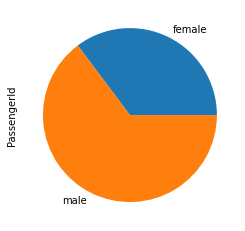

In [43]:
%matplotlib inline

titanic.groupby("Sex")["PassengerId"].count().plot.pie()

Cuidado ao usar um gráfico de pizza (torta), ele pode trazer pouco significado e esconder dados, principalmente quando existem muitas divisões.

**Quantas pessoas tem em cada cabine?**

In [44]:
titanic.groupby("Cabin")["PassengerId"].count().head(20)

Cabin
A10     1
A14     1
A16     1
A19     1
A20     1
A23     1
A24     1
A26     1
A31     1
A32     1
A34     1
A36     1
A5      1
A6      1
A7      1
B101    1
B102    1
B18     2
B19     1
B20     2
Name: PassengerId, dtype: int64

### **Desafio:** Quantas pessoas de casa sexo `sex` embarcaram `embarked` em cada porto?

A função `groupby` aceita listas.

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [54]:
#solução
embarked_sex = titanic.groupby(["Embarked", "Sex"])['PassengerId'].count()
embarked_sex

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

In [56]:
import seaborn as sns
sns.barplot(x = 'Embarked', y='PassengerId', data = embarked_sex, ci = False, hue = 'Sex')

ValueError: Could not interpret input 'Embarked'

Nós também podemos **somar** os valores após um agrupamento usando o `sum`, veja como pode ser útil.

![alt text](https://miro.medium.com/max/1400/0*m-puRNwcnUl5zZ4O)

**Qual a soma das idades das pessoas em cada cabine?**

In [60]:
titanic.groupby("Cabin")["Age"].sum().nlargest(20) #head(20)

Cabin
C23 C25 C27    130.0
B22            106.0
D20            106.0
B28            100.0
C125            98.0
B96 B98         97.0
D17             97.0
D33             97.0
D               95.0
E67             91.0
E44             89.0
C68             88.0
F33             87.0
D35             84.0
A23             80.0
C83             80.0
C78             77.0
E24             77.0
D26             75.0
B58 B60         74.0
Name: Age, dtype: float64

Nós também podemos descrobrir a **média** de um agrupamento usando o `mean`.

**Qual a idade média das pessoa em cada cabine?**

In [58]:
titanic.groupby("Cabin")["Age"].mean().head(20)

Cabin
A10     36.0
A14      NaN
A16     48.0
A19      NaN
A20     49.0
A23     80.0
A24     31.0
A26     56.0
A31     40.0
A32      NaN
A34      4.0
A36     39.0
A5      71.0
A6      28.0
A7      56.0
B101    35.0
B102     NaN
B18     30.0
B19     61.0
B20     24.0
Name: Age, dtype: float64

**Nós podemos em um único `groupby` pegar várias informações usando a função de agregar `agg`**

O `agg` tem um papel importante quando temos muitas linhas e passar por elas demora um tempo, conseguir na mesma passada por ela computar mais de um valor é ótimo para performance.

**Vamos retornar alguns dados das idades nas cabines**

In [61]:
titanic.groupby("Cabin")["Age"].agg([sum, min, max]).head(20)

,sum,min,max
Cabin,,,
A10,36.0,36.0,36.0
A14,0.0,NaN,NaN
A16,48.0,48.0,48.0
A19,0.0,NaN,NaN
A20,49.0,49.0,49.0
A23,80.0,80.0,80.0
A24,31.0,31.0,31.0
A26,56.0,56.0,56.0
A31,40.0,40.0,40.0


Nós podemos usar mais funções, o `pandas` tem uma ótima integração com o `NumPy`, uma ótima biblioteca numérica que vamos ver mais pra frente.

Agora vou aproveitar que ele cácula média e vamos usar o `np.mean`. Repare que iremos dar um "apelido" para o `numpy` e chamaremos ele de `np`.

**Soma, mais velhos, mais novos e média das idades em uma cabine**

In [62]:
import numpy as np

titanic.groupby("Cabin")["Age"].agg([sum, min, max, np.mean]).head(25)

,sum,min,max,mean
Cabin,,,,
A10,36.0,36.0,36.0,36.0
A14,0.0,NaN,NaN,NaN
A16,48.0,48.0,48.0,48.0
A19,0.0,NaN,NaN,NaN
A20,49.0,49.0,49.0,49.0
A23,80.0,80.0,80.0,80.0
A24,31.0,31.0,31.0,31.0
A26,56.0,56.0,56.0,56.0
A31,40.0,40.0,40.0,40.0


**Vamos salvar o nosso progresso, aproveitando para corrigir os nomes das colunas para seguir o padrão do DataFrame**

In [63]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Relatives', 'AgeRange',
       'idades_nao_nulas', 'Age_fillna_1', 'Age_fillna_mean',
       'Age_fillna_mean_sex'],
      dtype='object')

In [65]:
titanic.rename(columns={'idades_nao_nulas': 'AgeNotNull',
                        'Age_fillna_1': 'AgeFillNa-1',
                        'Age_fillna_mean_sex': 'AgeFillNaSexMean'}, inplace=True)

In [66]:
titanic.to_csv("titanic_2.csv", index=False)